In [2]:
from simulate import iterate, set_mb, view_mb, est_area
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import time
from scipy import stats

In [178]:
view_mb((-2,.5),(-1.1,1.1),(10,10),n=100,dpi=2000,colormap='Blues_r')
plt.savefig('Figures/mandelbrot_n100.pdf',dpi=300)

### Calculate area's for all sampling methods
#### Either run simulation (about an hour) or save (2nd cell) or load (3rd cell)

In [3]:
n_list = [50, 100, 200, 500, 1000, 2000, 3000, 4000, 5000]
s_list = [50, 100, 200, 500, 1000, 2000, 3000, 4000, 5000]
seedy = 10

In [24]:
np.random.seed(seedy)
start = time.time()
A_pure = est_area(n_list,s_list,reps=1,range_real=(-2,.5),range_im=(-1.1,1.1),sampling='pure')
print(str(time.time()-start))
A_lhs = est_area(n_list,s_list,reps=1,range_real=(-2,.5),range_im=(-1.1,1.1),sampling='lhs')
print(str(time.time()-start))
A_ortho = est_area(n_list,s_list,reps=1,range_real=(-2,.5),range_im=(-1.1,1.1),sampling='ortho')
print(str(time.time()-start))
A_imp = est_area(n_list,s_list,reps=1,range_real=(-2,.5),range_im=(-1.1,1.1),sampling='importance')
print(str(time.time()-start))

107.10527396202087
213.5988929271698
319.9718029499054
484.02038288116455


In [58]:
np.savetxt("Data/pure.csv", A_pure.reshape(A_pure.shape[0], -1), delimiter=",")
np.savetxt("Data/lhs.csv", A_lhs.reshape(A_lhs.shape[0], -1), delimiter=",")
np.savetxt("Data/ortho.csv", A_ortho.reshape(A_ortho.shape[0], -1), delimiter=",")
np.savetxt("Data/imp.csv", A_imp.reshape(A_imp.shape[0], -1), delimiter=",")

In [4]:
#Only run if old data is used
A_pure = np.genfromtxt('Data/pure.csv', delimiter=',')
A_pure = A_pure.reshape(A_pure.shape[0], A_pure.shape[1] // 50, 50)
A_lhs = np.genfromtxt('Data/lhs.csv', delimiter=',')
A_lhs = A_lhs.reshape(A_lhs.shape[0], A_lhs.shape[1] // 50, 50)
A_ortho = np.genfromtxt('Data/ortho.csv', delimiter=',')
A_ortho = A_ortho.reshape(A_ortho.shape[0], A_ortho.shape[1] // 50, 50)
A_imp = np.genfromtxt('Data/imp.csv', delimiter=',')
A_imp = A_imp.reshape(A_imp.shape[0], A_imp.shape[1] // 50, 50)


#### Plot errors for varying i 
- (2 by 2 and 4 by 1)
- See that differences are only induced by s when i > 1000.
- Also see that variance barely depends on i after a certain point.

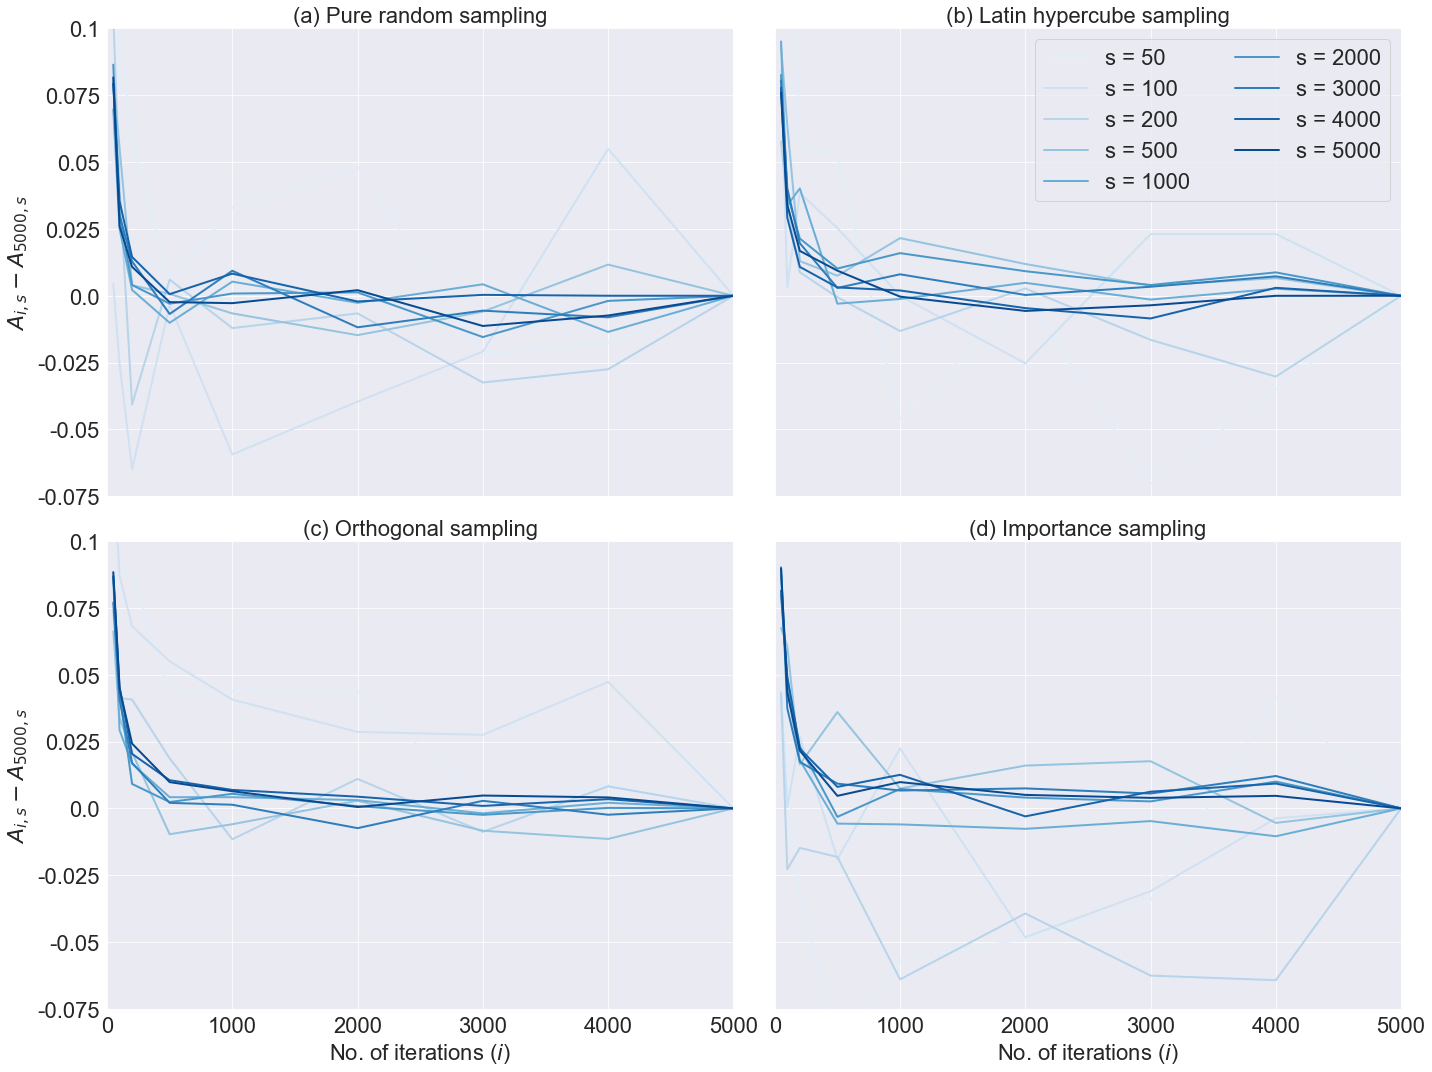

In [126]:
sns.set_style("darkgrid")
palette = sns.color_palette('Blues',len(s_list))
fig, axs = plt.subplots(2, 2, figsize=(20,15), sharex=True,sharey=True)
fig.tight_layout()     

for i in range(2):
    axs[1,i].set_xlabel(r'No. of iterations ($i$)', fontsize=22)
    axs[i,0].set_ylabel(r'$A_{i,s} - A_{5000,s}$', fontsize=22)
    for j in range(2):
        axs[i,j].set_yticks(np.arange(-0.1,0.3,0.025))
        labelrange = np.arange(-0.1,0.3,0.025)
        labelrange[4] = 0.0
        axs[i,j].set_yticklabels(np.round(labelrange,3), fontsize=22)
        axs[i,j].set_xticks(np.arange(0,5500,1000))
        axs[i,j].set_xticklabels(np.arange(0,5500,1000), fontsize=22)
        axs[i,j].set_xlim((0,5000))
        axs[i,j].set_ylim((-0.075,0.1))

sampling_list = [A_pure,A_lhs,A_ortho,A_imp]
sampling_labels = ['(a) Pure random sampling','(b) Latin hypercube sampling',
                   '(c) Orthogonal sampling','(d) Importance sampling']

for index in range(len(sampling_list)):
    for s in range(len(s_list)):
        mean = []
        std = []
        for i in range(len(n_list)):
            mean.append(np.mean(sampling_list[index][i, s]))
            std.append(np.std(sampling_list[index][i, s]))
        delta_mean = mean - mean[len(mean)-1]
        if index < 2:
            axs[0,index].plot(n_list, delta_mean,c=palette[s], linewidth=2, label = "s = {}".format(s_list[s]))
            axs[0,index].set_title(sampling_labels[index],fontsize=22)
        else:
            axs[1,index-2].plot(n_list, delta_mean,c=palette[s], linewidth=2, label = "s = {}".format(s_list[s]))
            axs[1,index-2].set_title(sampling_labels[index],fontsize=22)


    
axs[0,1].legend(fontsize=22,loc='upper right',ncol=2)
fig.tight_layout()
fig.savefig('Figures/delta_area_i_as_x.pdf',dpi=100)


### Plot vertically

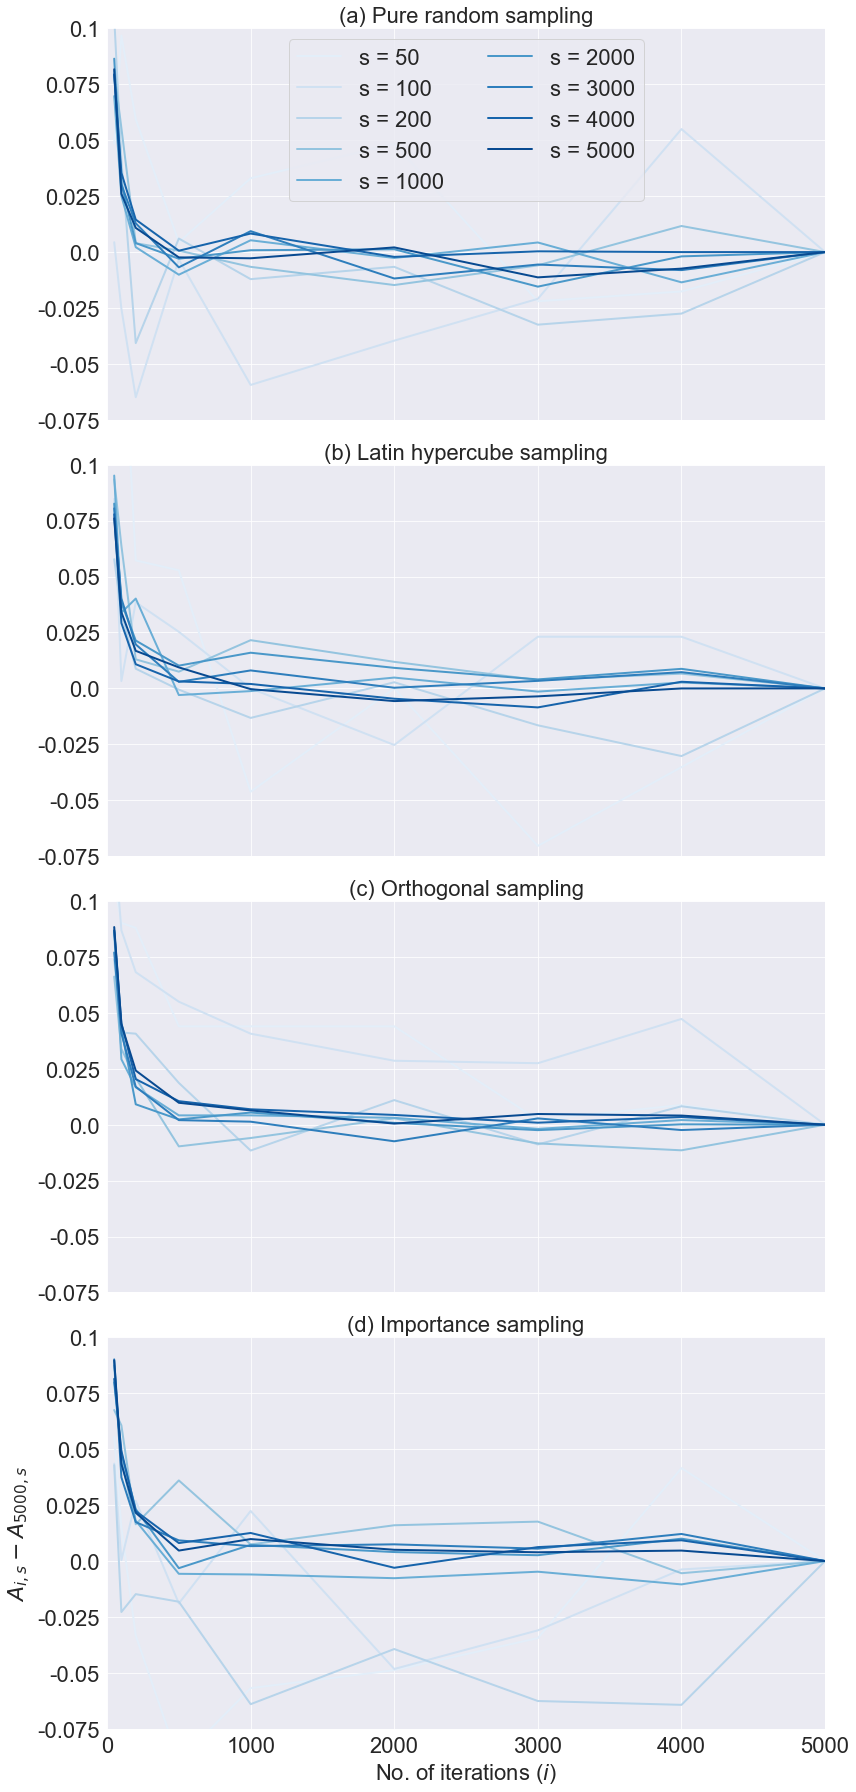

In [172]:
sns.set_style("darkgrid")
palette = sns.color_palette('Blues',len(s_list))
fig, axs = plt.subplots(4, 1, figsize=(12,25), sharex=True,sharey=False)
fig.tight_layout()     

axs[3].set_ylabel(r'$A_{i,s} - A_{5000,s}$', fontsize=22)
axs[3].set_xlabel(r'No. of iterations ($i$)', fontsize=22)

for i in range(4):
    axs[i].set_yticks(np.arange(-0.1,0.3,0.025))
    labelrange = np.arange(-0.1,0.3,0.025)
    labelrange[4] = 0.0
    axs[i].set_yticklabels(np.round(labelrange,3), fontsize=22)
    axs[i].set_xticks(np.arange(0,5500,1000))
    axs[i].set_xticklabels(np.arange(0,5500,1000), fontsize=22)
    axs[i].set_xlim((0,5000))
    axs[i].set_ylim((-0.075,0.1))

sampling_list = [A_pure,A_lhs,A_ortho,A_imp]
sampling_labels = ['(a) Pure random sampling','(b) Latin hypercube sampling',
                   '(c) Orthogonal sampling','(d) Importance sampling']

for index in range(len(sampling_list)):
    for s in range(len(s_list)):
        mean = []
        std = []
        for i in range(len(n_list)):
            mean.append(np.mean(sampling_list[index][i, s]))
            std.append(np.std(sampling_list[index][i, s]))
        delta_mean = mean - mean[len(mean)-1]
        axs[index].plot(n_list, delta_mean,c=palette[s], linewidth=2, label = "s = {}".format(s_list[s]))
        axs[index].set_title(sampling_labels[index],fontsize=22)


    
axs[0].legend(fontsize=22,loc='upper center',ncol=2)
fig.tight_layout()
fig.savefig('Figures/delta_area_i_as_x.pdf',dpi=300)


### Plot variance
- For all 4 sampling methods
- Only for pure sampling (similar to the rest)

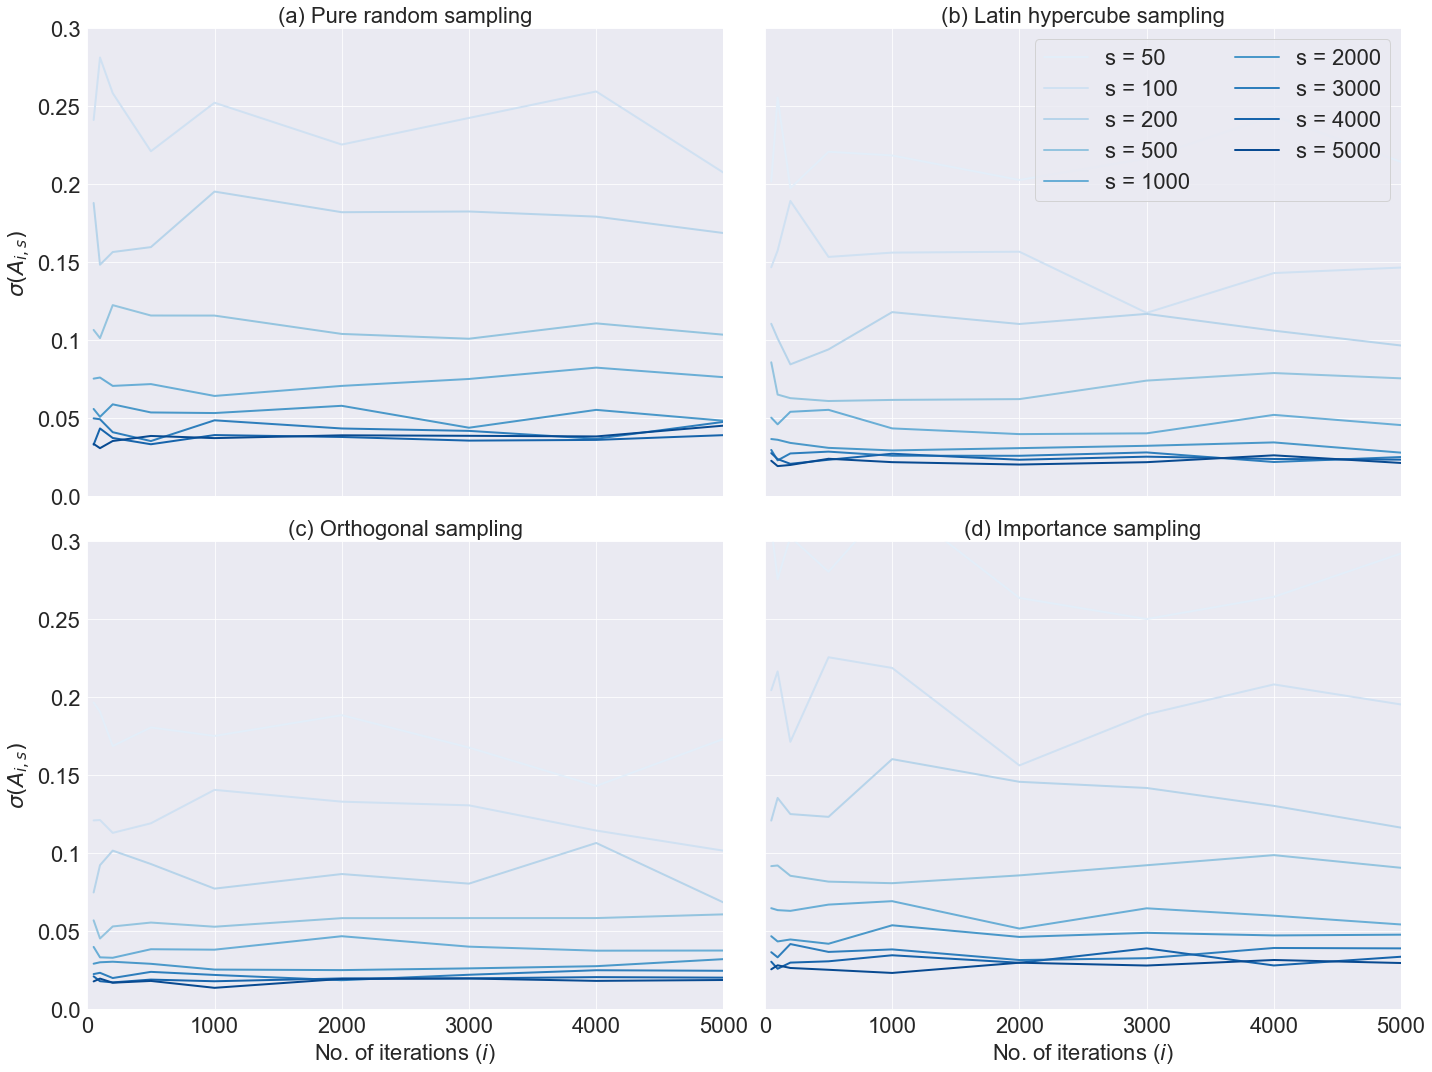

In [171]:
fig, axs = plt.subplots(2, 2, figsize=(20,15), sharex=True,sharey=True)
fig.tight_layout()     
palette = sns.color_palette('Blues',len(s_list))


for i in range(2):
    axs[1,i].set_xlabel(r'No. of iterations ($i$)', fontsize=22)
    axs[i,0].set_ylabel(r'$\sigma(A_{i,s})$', fontsize=22)
    for j in range(2):
        axs[i,j].set_yticks(np.arange(-0.1,0.35,0.05))
        axs[i,j].set_yticklabels(np.round(np.arange(-0.1,0.35,0.05),2), fontsize=22)
        axs[i,j].set_xticks(np.arange(0,5500,1000))
        axs[i,j].set_xticklabels(np.arange(0,5500,1000), fontsize=22)
        axs[i,j].set_xlim((0,5000))
        axs[i,j].set_ylim((0,0.3))
sampling_list = [A_pure,A_lhs,A_ortho,A_imp]
sampling_labels = ['(a) Pure random sampling','(b) Latin hypercube sampling',
                   '(c) Orthogonal sampling','(d) Importance sampling']

for index in range(len(sampling_list)):
    for s in range(len(s_list)):
        mean = []
        std = []
        for i in range(len(n_list)):
            mean.append(np.mean(sampling_list[index][i, s]))
            std.append(np.std(sampling_list[index][i, s]))
        delta_mean = mean - mean[len(mean)-1]
        if index < 2:
            axs[0,index].plot(n_list, std,c=palette[s], linewidth=2, label = "s = {}".format(s_list[s]))
            axs[0,index].set_title(sampling_labels[index],fontsize=22)

        else:
            axs[1,index-2].plot(n_list, std,c=palette[s], linewidth=2, label = "s = {}".format(s_list[s]))
            axs[1,index-2].set_title(sampling_labels[index],fontsize=22)
 
axs[0,1].legend(fontsize=22,loc='upper right',ncol=2)
fig.tight_layout()
fig.savefig('Figures/varianceplots_i_as_x.pdf',dpi=300)


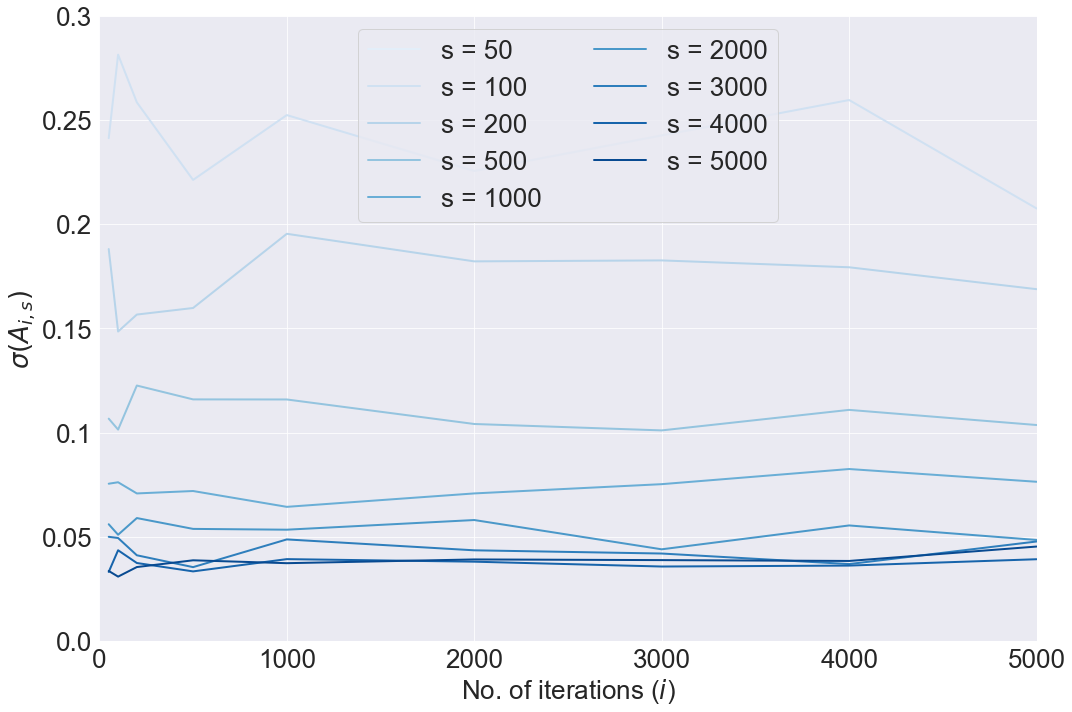

In [5]:
fig, axs = plt.subplots(1, figsize=(15,10), sharex=True,sharey=True)
fig.tight_layout()     
palette = sns.color_palette('Blues',len(s_list))


axs.set_xlabel(r'No. of iterations ($i$)', fontsize=26)
axs.set_ylabel(r'$\sigma(A_{i,s})$', fontsize=26)
axs.set_yticks(np.arange(-0.1,0.35,0.05))
axs.set_yticklabels(np.round(np.arange(-0.1,0.35,0.05),2), fontsize=26)
axs.set_xticks(np.arange(0,5500,1000))
axs.set_xticklabels(np.arange(0,5500,1000), fontsize=26)
axs.set_xlim((0,5000))
axs.set_ylim((0,0.3))

for s in range(len(s_list)):
    mean = []
    std = []
    for i in range(len(n_list)):
        mean.append(np.mean(A_pure[i, s]))
        std.append(np.std(A_pure[i, s]))
    delta_mean = mean - mean[len(mean)-1]
    axs.plot(n_list, std,c=palette[s], linewidth=2, label = "s = {}".format(s_list[s]))
    
axs.legend(fontsize=26,loc='upper center',ncol=2)
fig.tight_layout()
fig.savefig('Figures/varianceplot_solo_i_as_x.pdf',dpi=300)


### Plot errors for varying s

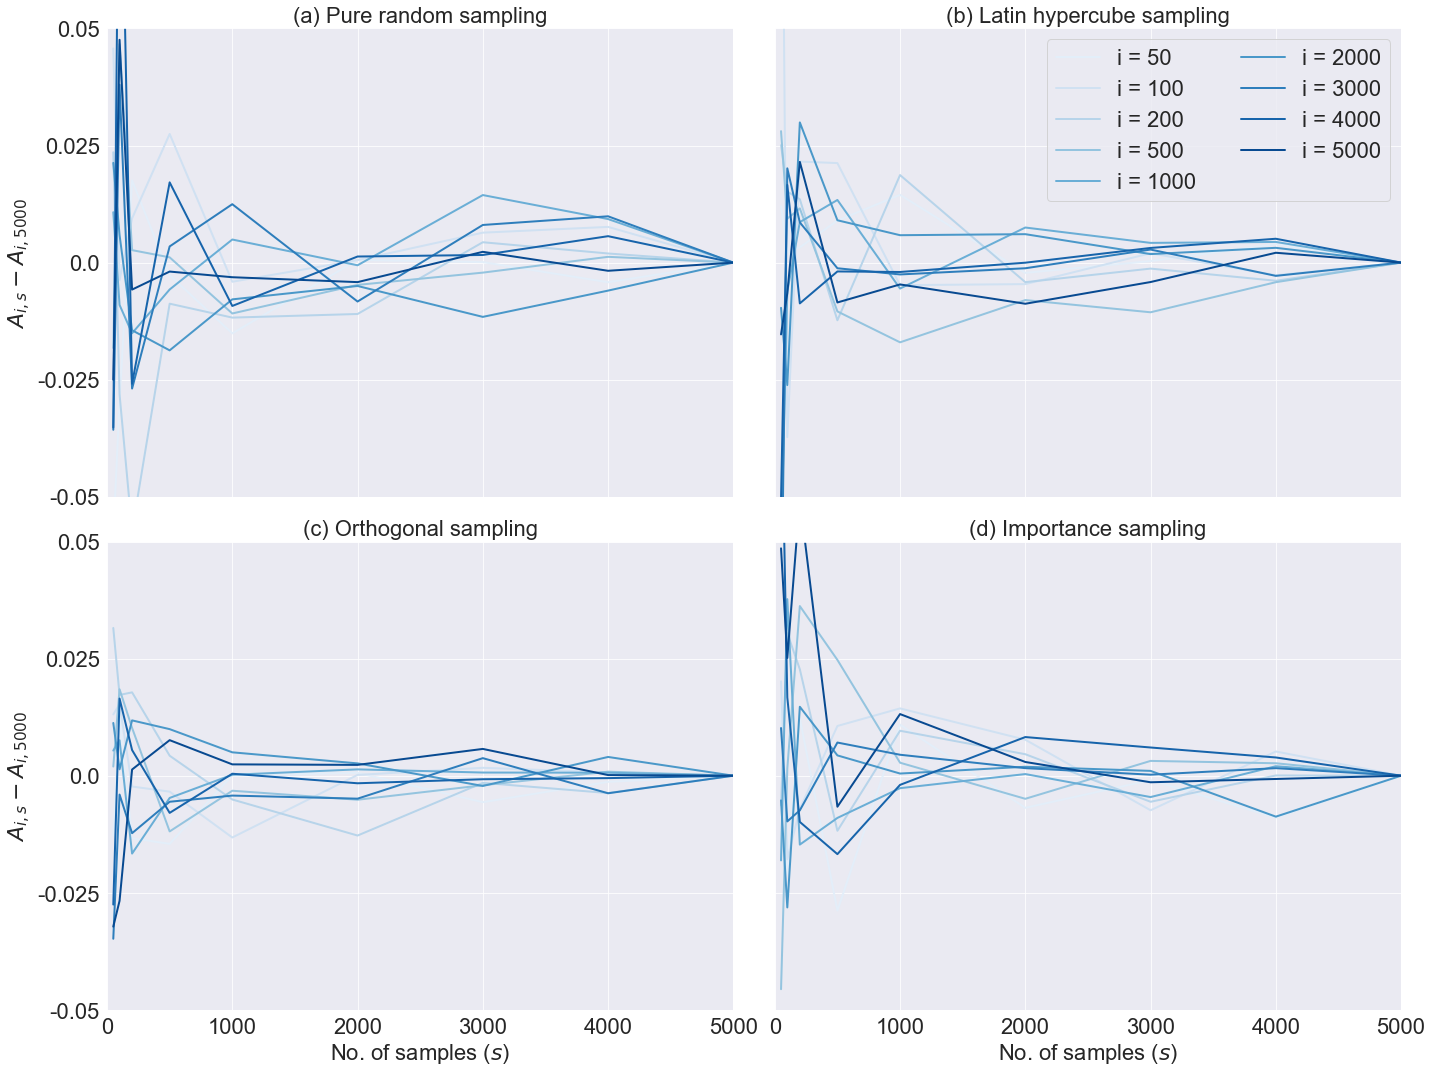

In [169]:
fig, axs = plt.subplots(2, 2, figsize=(20,15), sharex=True,sharey=True)
fig.tight_layout()     
palette = sns.color_palette('Blues',len(s_list))


for i in range(2):
    axs[1,i].set_xlabel(r'No. of samples ($s$)', fontsize=22)
    axs[i,0].set_ylabel(r'$A_{i,s} - A_{i,5000}$', fontsize=22)
    for j in range(2):
        axs[i,j].set_yticks(np.arange(-0.1,0.3,0.025))
        labelrange = np.arange(-0.1,0.3,0.025)
        labelrange[4] = 0.0
        axs[i,j].set_yticklabels(np.round(labelrange,3), fontsize=22)
        axs[i,j].set_xticks(np.arange(0,5500,1000))
        axs[i,j].set_xticklabels(np.arange(0,5500,1000), fontsize=22)
        axs[i,j].set_xlim((0,5000))
        axs[i,j].set_ylim((-0.05,0.05))
sampling_list = [A_pure,A_lhs,A_ortho,A_imp]
sampling_labels = ['(a) Pure random sampling','(b) Latin hypercube sampling',
                   '(c) Orthogonal sampling','(d) Importance sampling']

for index in range(len(sampling_list)):
    for i in range(len(n_list)):
        mean = []
        std = []
        for s in range(len(s_list)):
            mean.append(np.mean(sampling_list[index][i, s]))
            std.append(np.std(sampling_list[index][i, s]))
        delta_mean = mean - mean[len(mean)-1]
        errors_pos = [sum(a) for a in zip(*[delta_mean,std])]
        errors_neg = [sum(a) for a in zip(*[delta_mean,[-x for x in std]])]
        if index < 2:
            axs[0,index].plot(s_list, delta_mean,c=palette[i], linewidth=2, label = "i = {}".format(n_list[i]))
            axs[0,index].set_title(sampling_labels[index],fontsize=22)

        else:
            axs[1,index-2].plot(s_list, delta_mean,c=palette[i], linewidth=2, label = "i = {}".format(n_list[i]))
            axs[1,index-2].set_title(sampling_labels[index],fontsize=22)

    
axs[0,1].legend(fontsize=22,loc='upper right',ncol=2)
fig.tight_layout()
fig.savefig('Figures/delta_area_s_as_x.pdf',dpi=300)


### Plot standard deviation of s
- Obviously decreasing
- Also plot pure random sampling only, represents the rest decently

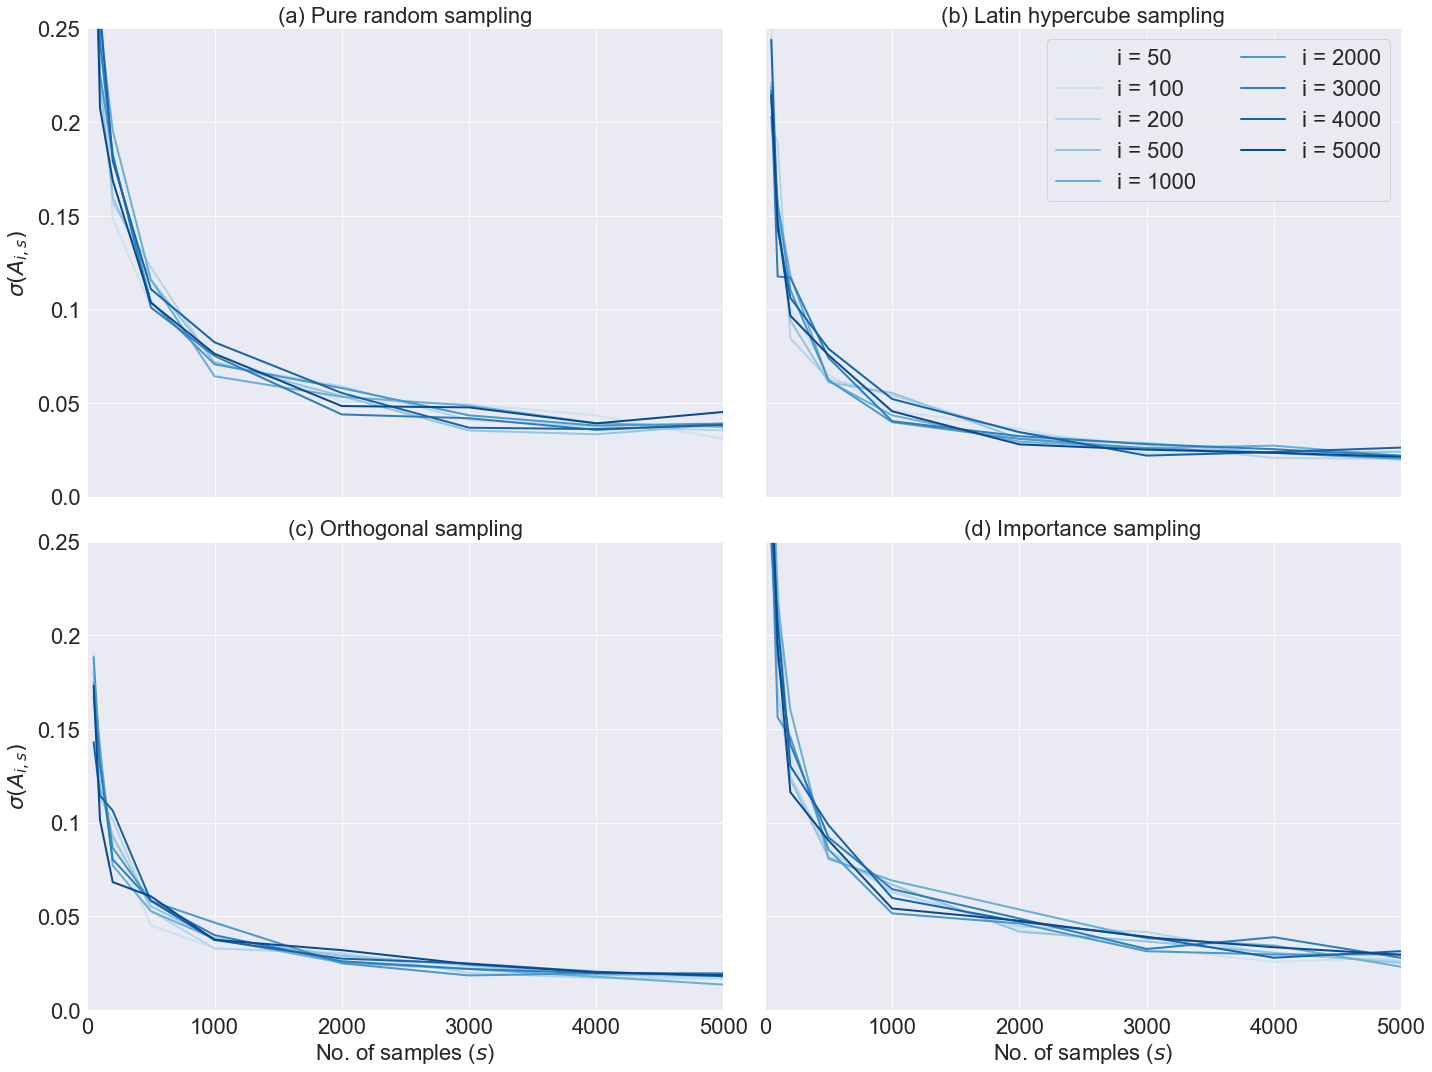

In [168]:
fig, axs = plt.subplots(2, 2, figsize=(20,15), sharex=True,sharey=True)
fig.tight_layout()
palette = sns.color_palette('Blues',len(s_list))


for i in range(2):
    axs[1,i].set_xlabel(r'No. of samples ($s$)', fontsize=22)
    axs[i,0].set_ylabel(r'$\sigma\left(A_{i,s}\right)$', fontsize=22)
    for j in range(2):
        axs[i,j].set_yticks(np.arange(-0.1,0.3,0.05))
        axs[i,j].set_yticklabels(np.round(np.arange(-0.1,0.3,0.05),2), fontsize=22)
        axs[i,j].set_xticks(np.arange(0,5500,1000))
        axs[i,j].set_xticklabels(np.arange(0,5500,1000), fontsize=22)
        axs[i,j].set_xlim((0,5000))
        axs[i,j].set_ylim((0,0.25))
sampling_list = [A_pure,A_lhs,A_ortho,A_imp]
sampling_labels = ['(a) Pure random sampling','(b) Latin hypercube sampling',
                   '(c) Orthogonal sampling','(d) Importance sampling']

for index in range(len(sampling_list)):
    for i in range(len(n_list)):
        mean = []
        std = []
        for s in range(len(s_list)):
            mean.append(np.mean(sampling_list[index][i, s]))
            std.append(np.std(sampling_list[index][i, s]))
        delta_mean = mean - mean[len(mean)-1]
        errors_pos = [sum(a) for a in zip(*[delta_mean,std])]
        errors_neg = [sum(a) for a in zip(*[delta_mean,[-x for x in std]])]
        if index < 2:
            axs[0,index].plot(s_list, std,c=palette[i], linewidth=2, label = "i = {}".format(n_list[i]))
            axs[0,index].set_title(sampling_labels[index],fontsize=22)

        else:
            axs[1,index-2].plot(s_list, std,c=palette[i], linewidth=2, label = "i = {}".format(n_list[i]))
            axs[1,index-2].set_title(sampling_labels[index],fontsize=22)
            
axs[0,1].legend(fontsize=22,loc='upper right',ncol=2)
fig.tight_layout()
fig.savefig('Figures/varianceplots_s_as_x.pdf',dpi=300)


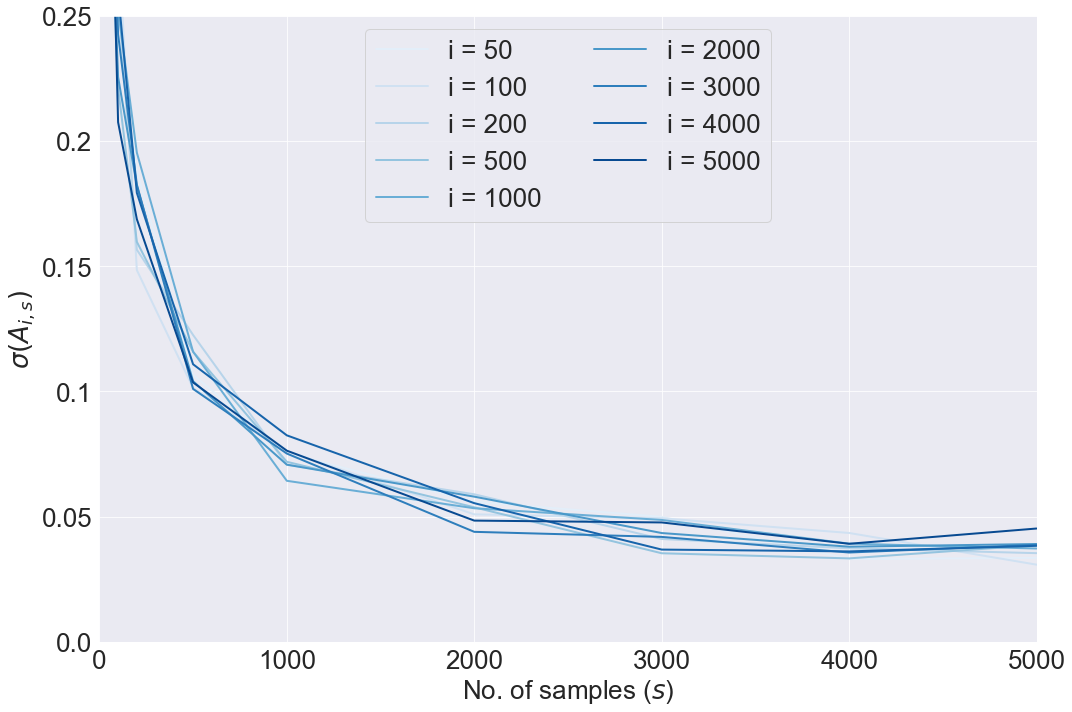

In [6]:
fig, axs = plt.subplots(1, figsize=(15,10), sharex=True,sharey=True)
fig.tight_layout()     
palette = sns.color_palette('Blues',len(n_list))


axs.set_xlabel(r'No. of samples ($s$)', fontsize=26)
axs.set_ylabel(r'$\sigma(A_{i,s})$', fontsize=26)
axs.set_yticks(np.arange(-0.1,0.35,0.05))
axs.set_yticklabels(np.round(np.arange(-0.1,0.35,0.05),2), fontsize=26)
axs.set_xticks(np.arange(0,5500,1000))
axs.set_xticklabels(np.arange(0,5500,1000), fontsize=26)
axs.set_xlim((0,5000))
axs.set_ylim((0,0.25))

for i in range(len(n_list)):
    mean = []
    std = []
    for s in range(len(s_list)):
        mean.append(np.mean(A_pure[i, s]))
        std.append(np.std(A_pure[i, s]))
    delta_mean = mean - mean[len(mean)-1]
    axs.plot(s_list, std,c=palette[i], linewidth=2, label = "i = {}".format(n_list[i]))
    
axs.legend(fontsize=26,loc='upper center',ncol=2)
fig.tight_layout()
fig.savefig('Figures/varianceplot_solo_s_as_x.pdf',dpi=300)


### Area and variance for i = 1000
- Results do not seem to improve with i increasing after 1000
- So look at i=1000 and the variance for various s (higher than 5000)

In [10]:
n_list2 = [1000]
s_list2 = [50, 100, 200, 500, 1000, 2000, 3000, 4000, 5000, 10000, 12500, 15000, 17500, 20000]

In [53]:
np.random.seed(seedy)
start = time.time()
A_pure2 = est_area(n_list2,s_list2,reps=50,range_real=(-2,.5),range_im=(-1.1,1.1),sampling='pure')
print(str(time.time()-start))
A_lhs2 = est_area(n_list2,s_list2,reps=50,range_real=(-2,.5),range_im=(-1.1,1.1),sampling='lhs')
print(str(time.time()-start))
A_ortho2 = est_area(n_list2,s_list2,reps=50,range_real=(-2,.5),range_im=(-1.1,1.1),sampling='ortho')
print(str(time.time()-start))
A_imp2 = est_area(n_list2,s_list2,reps=50,range_real=(-2,.5),range_im=(-1.1,1.1),sampling='importance')
print(str(time.time()-start))

426.8583388328552
866.4322319030762
1303.235694885254
2268.9043447971344


In [54]:
np.savetxt("Data/pure2.csv", A_pure2.reshape(A_pure2.shape[1], -1), delimiter=",")
np.savetxt("Data/lhs2.csv", A_lhs2.reshape(A_lhs2.shape[1], -1), delimiter=",")
np.savetxt("Data/ortho2.csv", A_ortho2.reshape(A_ortho2.shape[1], -1), delimiter=",")
np.savetxt("Data/imp2.csv", A_imp2.reshape(A_imp2.shape[1], -1), delimiter=",")

In [8]:
#Only run if old data is used
A_pure2 = np.genfromtxt('Data/pure2.csv', delimiter=',')
A_lhs2 = np.genfromtxt('Data/lhs2.csv', delimiter=',')
A_ortho2 = np.genfromtxt('Data/ortho2.csv', delimiter=',')
A_imp2 = np.genfromtxt('Data/imp2.csv', delimiter=',')

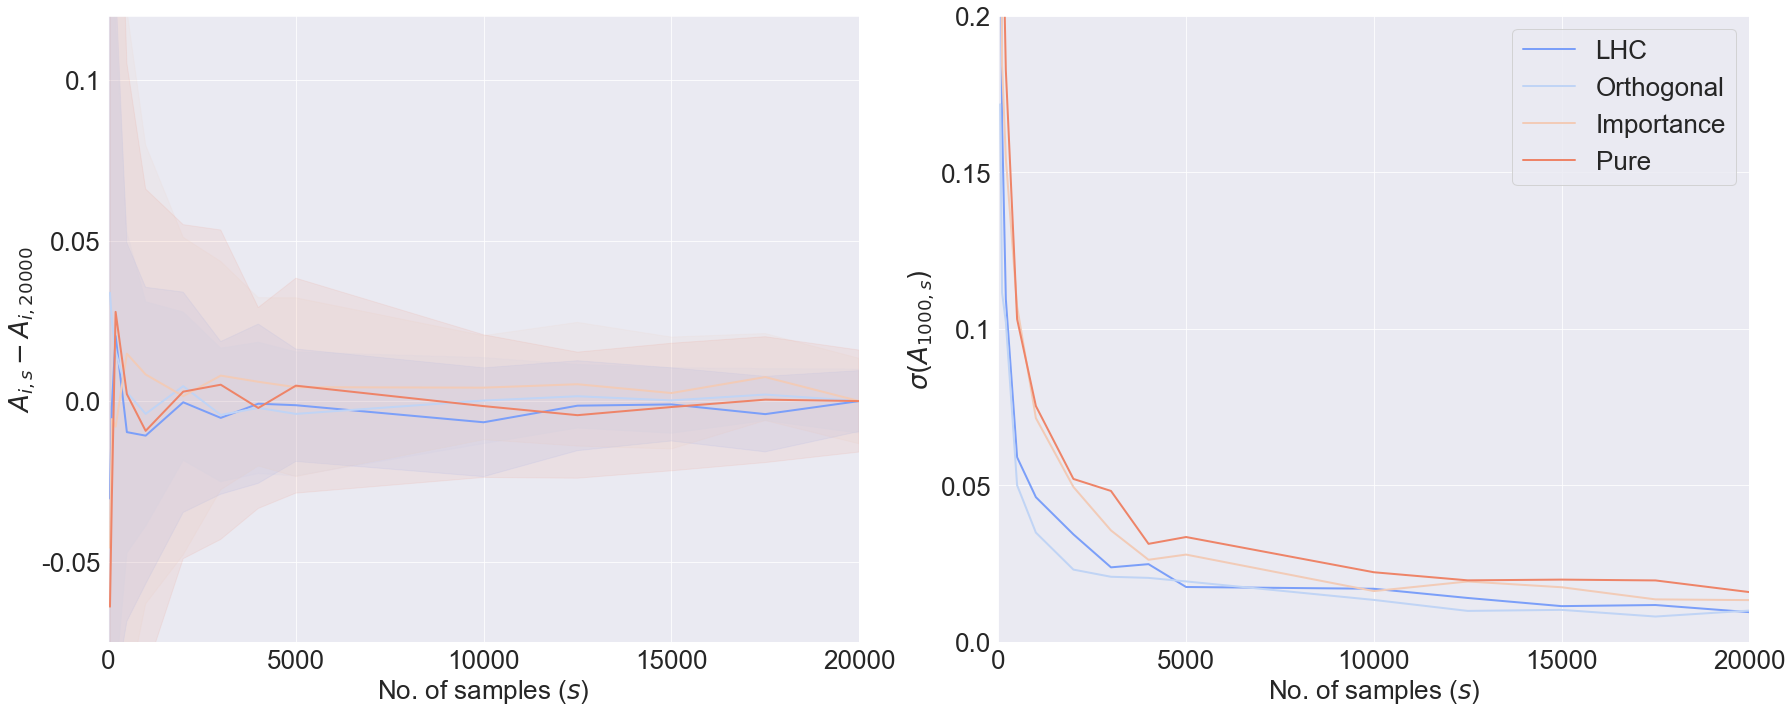

In [11]:
fig, axs = plt.subplots(1,2, figsize=(25,10),sharey=False)
fig.tight_layout()   

sampling_list = [A_lhs2,A_ortho2,A_imp2,A_pure2]
sampling_string = ['LHC','Orthogonal','Importance','Pure']
palette = sns.color_palette('coolwarm',len(sampling_list))

for i in range(2):
    axs[i].set_xticks(np.arange(0,20500,5000))
    axs[i].set_xticklabels(np.arange(0,20500,5000), fontsize=26)
    axs[i].set_xlim((0,20000))
    axs[i].set_xlabel(r'No. of samples ($s$)', fontsize=26)

axs[0].set_ylabel(r'$A_{i,s} - A_{i,20000}$', fontsize=26)
axs[0].set_yticks(np.arange(-0.1,0.3,0.05))
axs[0].set_yticklabels(np.round(np.arange(-0.1,0.25,0.05),2), fontsize=26)
axs[0].set_ylim((-0.075,0.12))
axs[1].set_ylabel(r'$\sigma(A_{1000,s})$', fontsize=26)
axs[1].set_yticks(np.arange(-0.1,0.3,0.05))
axs[1].set_yticklabels(np.round(np.arange(-0.1,0.25,0.05),2), fontsize=26)
axs[1].set_ylim((0,0.2))


for index in range(len(sampling_list)):

    mean = []
    std = []
    for s in range(len(s_list2)):
        mean.append(np.mean(sampling_list[index][s]))
        std.append(np.std(sampling_list[index][s]))
    delta_mean = mean - mean[len(mean)-1]
    errors_pos = [sum(a) for a in zip(*[delta_mean,std])]
    errors_neg = [sum(a) for a in zip(*[delta_mean,[-x for x in std]])]
    axs[0].plot(s_list2, delta_mean,color=palette[index], linewidth=2, label = "{}".format(sampling_string[index]))
    axs[0].fill_between(s_list2, errors_pos, errors_neg,color=palette[index], alpha=0.1)
    axs[1].plot(s_list2, std,c=palette[index], linewidth=2, label = "{}".format(sampling_string[index]))

axs[1].legend(fontsize=26,loc='upper right',ncol=1)
fig.tight_layout()
fig.savefig('Figures/i1000_inclconfidence.pdf',dpi=300)


### Calculate confidence intervals

In [144]:
i_test = [500, 1000, 5000]
s_test = [500, 5000]
sampling_list = [A_pure,A_lhs,A_ortho,A_imp]
sampling_string = ['Pure','LHC','Orthogonal','Importance']

CI = {}
for index in range(len(sampling_list)):
    for i in i_test:
        for s in s_test:
            data = sampling_list[index][n_list.index(i),s_list.index(s)]
            CI_range = 1.96*np.std(data)/np.sqrt(s)
            CI[(sampling_string[index],'i = {}'.format(i),'s = {}'.format(s))] = [(round(np.mean(data)-CI_range,3),
                                                             round(np.mean(data)+CI_range,3))]
            
CI

    

{('Pure', 'i = 500', 's = 500'): [(1.503, 1.523)],
 ('Pure', 'i = 500', 's = 5000'): [(1.511, 1.513)],
 ('Pure', 'i = 1000', 's = 500'): [(1.496, 1.516)],
 ('Pure', 'i = 1000', 's = 5000'): [(1.511, 1.513)],
 ('Pure', 'i = 5000', 's = 500'): [(1.503, 1.522)],
 ('Pure', 'i = 5000', 's = 5000'): [(1.513, 1.516)],
 ('LHC', 'i = 500', 's = 500'): [(1.505, 1.516)],
 ('LHC', 'i = 500', 's = 5000'): [(1.52, 1.521)],
 ('LHC', 'i = 1000', 's = 500'): [(1.519, 1.53)],
 ('LHC', 'i = 1000', 's = 5000'): [(1.51, 1.512)],
 ('LHC', 'i = 5000', 's = 500'): [(1.496, 1.509)],
 ('LHC', 'i = 5000', 's = 5000'): [(1.511, 1.512)],
 ('Orthogonal', 'i = 500', 's = 500'): [(1.497, 1.507)],
 ('Orthogonal', 'i = 500', 's = 5000'): [(1.513, 1.514)],
 ('Orthogonal', 'i = 1000', 's = 500'): [(1.501, 1.51)],
 ('Orthogonal', 'i = 1000', 's = 5000'): [(1.51, 1.511)],
 ('Orthogonal', 'i = 5000', 's = 500'): [(1.506, 1.517)],
 ('Orthogonal', 'i = 5000', 's = 5000'): [(1.504, 1.505)],
 ('Importance', 'i = 500', 's = 500'

### Test for variance reduction

In [143]:
s_test = [1000, 5000, 20000]
sampling_list = [A_pure2,A_lhs2,A_ortho2,A_imp2]
sampling_string = ['Pure','LHC','Orthogonal','Importance']

var_pure = [np.var(A_pure2[s_list2.index(j)]) for j in s_test]
var_dict = {}
for index in range(len(sampling_list)):
    for s in s_test:
        data = sampling_list[index][s_list2.index(s)]
        if np.var(data) > var_pure[s_test.index(s)]:
            var_dict[(sampling_string[index],'*s = {}'.format(s))] = [round(np.var(data),5),
                                                round(np.var(data)/var_pure[s_test.index(s)],4),
                                                round(stats.f.ppf(q=0.90,dfn=s-1,dfd=s-1),4)]
        else:
            var_dict[(sampling_string[index],'s = {}'.format(s))] = [round(np.var(data),5),
                                                round(var_pure[s_test.index(s)]/np.var(data),4),
                                                round(stats.f.ppf(q=0.99,dfn=s-1,dfd=s-1),4)]
            
var_dict

{('Pure', 's = 1000'): [0.00568, 1.0, 1.1587],
 ('Pure', 's = 5000'): [0.00112, 1.0, 1.068],
 ('Pure', 's = 20000'): [0.00025, 1.0, 1.0334],
 ('LHC', 's = 1000'): [0.00214, 2.6575, 1.1587],
 ('LHC', 's = 5000'): [0.00031, 3.6548, 1.068],
 ('LHC', 's = 20000'): [9e-05, 2.8123, 1.0334],
 ('Orthogonal', 's = 1000'): [0.00122, 4.6615, 1.1587],
 ('Orthogonal', 's = 5000'): [0.00037, 3.0113, 1.068],
 ('Orthogonal', 's = 20000'): [0.0001, 2.5358, 1.0334],
 ('Importance', 's = 1000'): [0.00511, 1.1105, 1.1587],
 ('Importance', 's = 5000'): [0.00078, 1.4433, 1.068],
 ('Importance', 's = 20000'): [0.00018, 1.4224, 1.0334]}